In [98]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd  

%matplotlib inline

In [2]:
lmbda = np.linspace(0, 1, 100) ## this function divides range (0,1) in 100 points

## Below are 4 functions taken from Quantum Oscillations.pdf file from formula (2.8)
def eighen_val1(lmbda):
    return (6+ (15*lmbda) + 2 * math.sqrt(2) * math.sqrt(2 + (12*lmbda) + (27* lmbda*lmbda))) / 4.

def eighen_val2(lmbda):
    return (6+ (15*lmbda) - 2 * math.sqrt(2) * math.sqrt(2 + (12*lmbda) + (27* lmbda*lmbda))) / 4.

def eighen_val3(lmbda):
    return (10+ (15*lmbda) + 2 * math.sqrt(2) * math.sqrt(2 + (27* lmbda*lmbda))) / 4.

def eighen_val4(lmbda):
    return (10+ (15*lmbda) - 2 * math.sqrt(2) * math.sqrt(2 + (27* lmbda*lmbda))) / 4.

In [3]:
e1 = [eighen_val1(l) for l in lmbda] # for each 100 values of lambda we calculate 1st eighen value
e2 = [eighen_val2(l) for l in lmbda] # for each 100 values of lambda we calculate 2nd eighen value
e3 = [eighen_val3(l) for l in lmbda] # for each 100 values of lambda we calculate 3rd eighen value
e4 = [eighen_val4(l) for l in lmbda] # for each 100 values of lambda we calculate 4th eighen value

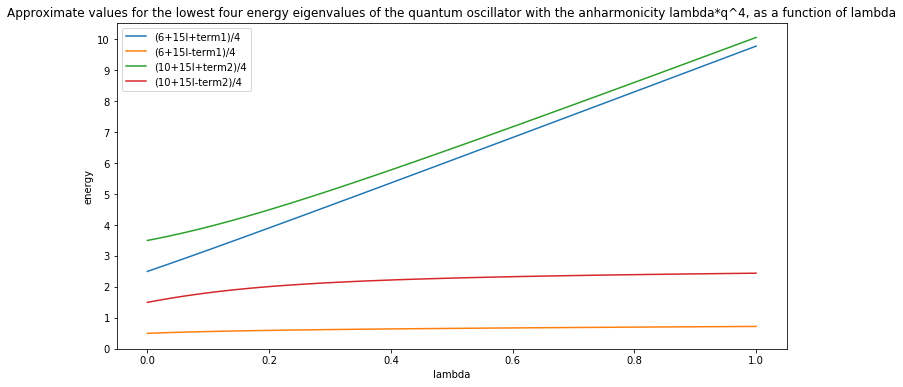

In [228]:
plt.figure(figsize=(12,6)) ## We choose figure size to be (12inch , 8 inch)
plt.plot(lmbda, e1, label = '(6+15l+term1)/4') # We are plotting lambda(X-axis) versus 1st eighnvalue(y-axis) as line plot
plt.plot(lmbda, e2, label = '(6+15l-term1)/4') # We are plotting lambda(X-axis) versus 2nd eighnvalue(y-axis) as line plot
plt.plot(lmbda, e3, label = '(10+15l+term2)/4') # We are plotting lambda(X-axis) versus 3rd eighnvalue(y-axis) as line plot
plt.plot(lmbda, e4, label = '(10+15l-term2)/4') # We are plotting lambda(X-axis) versus 4th eighnvalue(y-axis) as line plot
plt.xlabel('lambda') # Label for X-axis
plt.ylabel('energy') # Label for Y-axis
plt.yticks(np.arange(0,11)) ## We are setting y labels from (0,10) [0,1,2,...10]
plt.xticks(np.linspace(0, 1.0 ,6)) ## We are setting x labels to be in range from (0,1)[0,0.2,0.4,0.6,0.8,1.0]
plt.legend(loc='best') ## We find best location to show legend where we display each eigenvalue names.
title = plt.title('Approximate values for the lowest four energy eigenvalues of the quantum oscillator with the anharmonicity lambda*q^4, as a function of lambda')

In [230]:
one_by_n = 1. / np.arange(7,21) ## We are calculating 1/n for n from 7 to 20. We took till 21 because it does not take ending value.
one_by_n

array([ 0.14285714,  0.125     ,  0.11111111,  0.1       ,  0.09090909,
        0.08333333,  0.07692308,  0.07142857,  0.06666667,  0.0625    ,
        0.05882353,  0.05555556,  0.05263158,  0.05      ])

In [66]:
## Below function takes as input j,k dimension and calculates q matrix as per Quantum Oscillation.pdf algorithms
## Whenever indices for (row_index-column_index) is equal to 1, it initializes with sqrt(row_index+col_index+1)/2
## Whenever that condition does not satisfy then set array value to 0.0. We loop through all values of matrix to set it.
def create_q(j, k):
    q = np.empty((j,k), dtype=np.double) ## We have selected data type as double to show more accuracy of floats
    for i in range(j):
        for l in range(k):
            if abs(i-l) == 1:
                q[i][l] = math.sqrt(i+l+1) / 2.
            else:
                q[i][l] = 0.0
    return q

## Below function creates h0 of formula 2.2 of Quantum Oscillations.pdf. 
## We loop through al values of matrix and then check if row and column indexes are same then initialize it with 
## index + 0.5 else initialize it with 0.0
def create_h0(j):
    h0 = np.empty((j,j), dtype=np.double) ## We have selected data type as double to show more accuracy of floats
    for i in range(j):
        for l in range(j):
            if i == l:
                h0[i][l] = i+ (1./ 2.)
            else:
                h0[i][l] = 0.0
    return h0

In [231]:
create_q(4,4) ## Testing q with matrix of size (4,4)

array([[ 0.        ,  0.70710678,  0.        ,  0.        ],
       [ 0.70710678,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  1.22474487],
       [ 0.        ,  0.        ,  1.22474487,  0.        ]])

In [232]:
create_h0(4) ## Testing h0 with matrix of size (4,4)

array([[ 0.5,  0. ,  0. ,  0. ],
       [ 0. ,  1.5,  0. ,  0. ],
       [ 0. ,  0. ,  2.5,  0. ],
       [ 0. ,  0. ,  0. ,  3.5]])

In [233]:
## Below is logic which calculates hamiltonian matrix for sizes 7 till 20.
## We have set lambda to be 0.1 as required for plot.
## After calculating hamiltonian matrix we find it's eigenvalues, sort them and take smallest one for plot.
e0s = []
for i in range(7,21):
    h0 = create_h0(i)
    q = create_q(i,i)
    lmbd = 0.1

    hn = h0 + lmbd * np.dot(np.dot(np.dot(q , q) , q) , q)
    es = np.sort(np.linalg.eigvals(hn))
    #print(es)
    e0s.append(es[0])
e0s

[0.55910625832476724,
 0.55913399248251228,
 0.55915523828409441,
 0.55914354627353446,
 0.55914637881651652,
 0.55914659930009392,
 0.55914616661094796,
 0.559146360351642,
 0.55914633171748906,
 0.55914631889325006,
 0.55914633089019961,
 0.55914632631884598,
 0.55914632702104239,
 0.55914632739606906]

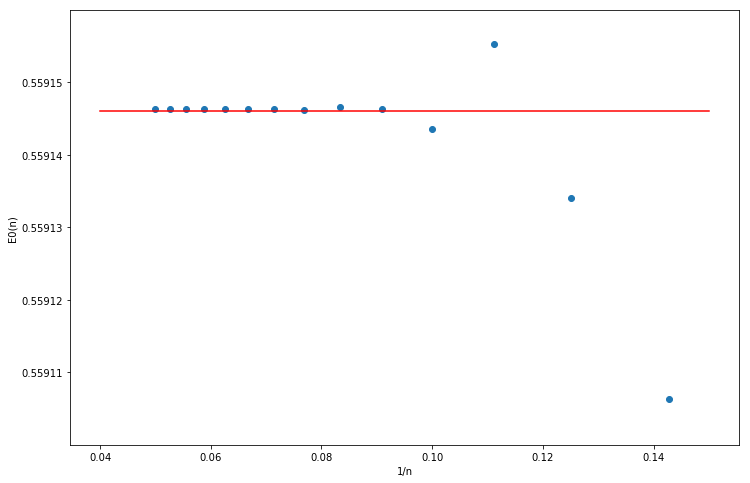

In [234]:
plt.figure(figsize=(12,8)) ## We choose figure size to be (12inch , 8 inch)
plt.scatter(x = one_by_n, y = e0s) ## We choose this one as scatter plot because we want to plot 1/n on x versus smallest eigenvalues on y axis which we derived above.
plt.ylim((0.55910000000,0.559160000000)) ## We are setting Y axis limit between 0.55910 to 0.55916 to cover all dataq points
x = np.linspace(0.04, 0.15, 15) ## We are taking this array to plot line at 0.559146
plt.plot(x, [0.559146000]*len(x), color='red' ) ## We plot straight line at y = 0.55914000
plt.yticks([0.55911,0.55912,0.55913,0.55914,0.55915], ['0.55911','0.55912','0.55913','0.55914','0.55915']) ## Setting Y lables on Y-axis
plt.xlabel('1/n') ## setting X-asix label to be 1/n
lb = plt.ylabel('E0(n)') ## Setting Y-axis label to be E0(n) energies

In [237]:
np.linalg.eigvals(np.arange(1,17).reshape(4,4)) ## Matrix of size 4,4 returns 4 eigenvalues

array([  3.62093727e+01,  -2.20937271e+00,  -3.18863232e-15,
        -1.34840081e-16])

In [239]:
np.linalg.eigvals(np.arange(1,26).reshape(5,5)) ## Matrix of size 5,5 returns 5 eigenvalues

array([  6.86420807e+01,  -3.64208074e+00,  -2.74904167e-15,
        -2.12798147e-15,   8.18309662e-16])

In [242]:
## Below is logic which calculates hamiltonian matrix for for size 20 which creates 20 levels.
## We have set lambda to be from various values between 0 to 100 as required for plot.
## After calculating hamiltonian matrix we find it's eigenvalues, sort them and take 5-smallest values for plot.
e5s = []
for lmbd in np.linspace(0,1,100):
    h0 = create_h0(20)
    q = create_q(20,20)
    hn = h0 + lmbd * np.dot(np.dot(np.dot(q , q) , q) , q)
    es = np.sort(np.linalg.eigvals(hn))
    #print(es)
    e5s.append(es[:5])
e5s = np.array(e5s).T

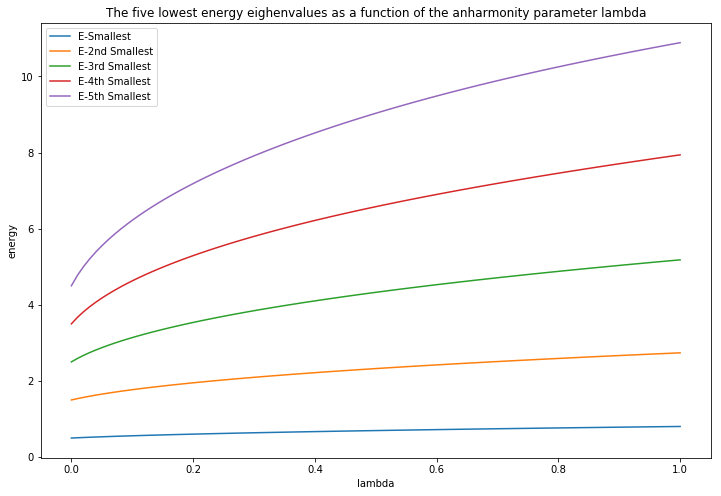

In [245]:
lmbda = np.linspace(0, 1, 100) ## Deviding range (0,1) in 100 different points for plottig on X-axis
plt.figure(figsize=(12,8)) ## Setting figure size to be 12 inch by 8 inch.
plt.plot(lmbda, e5s[0], label='E-Smallest') ## Plotting lambda versus smallest energy eigenvalue
plt.plot(lmbda, e5s[1], label='E-2nd Smallest') ## Plotting lambda versus 2nd smallest energy eigenvalue
plt.plot(lmbda, e5s[2], label='E-3rd Smallest') ## Plotting lambda versus 3rd smallest energy eigenvalue
plt.plot(lmbda, e5s[3], label='E-4th Smallest') ## Plotting lambda versus 4th smallest energy eigenvalue
plt.plot(lmbda, e5s[4], label='E-5th Smallest') ## Plotting lambda versus 5th smallest energy eigenvalue
plt.xlabel('lambda') ## Label for X -axis
plt.ylabel('energy') ## Label for Y-axis
plt.legend(loc='best') ## Putting legend at best location for 5 smallest energies with 20 levels
title = plt.title('The five lowest energy eighenvalues as a function of the anharmonity parameter lambda')